In [1]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/geothomas/playstore-dataset')

Skipping, found downloaded files in ".\playstore-dataset" (use force=True to force download)


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import  tqdm

In [60]:
#configurations
sns.set_style("darkgrid")
pd.set_option('display.max_columns', None)
tqdm.pandas()

In [61]:
df = pd.read_csv('playstore-dataset/Playstore_final.csv',on_bad_lines='skip')

C:\Users\laksh\AppData\Local\Temp\ipykernel_11992\3647779149.py:1: DtypeWarning: Columns (7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('playstore-dataset/Playstore_final.csv',on_bad_lines='skip')


In [62]:
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last update,Privacy Policy,Content Rating,Ad Supported,In app purchases,Editor Choice,Summary,Reviews,Android version Text,Developer,Developer Address,Developer Internal ID,Version
0,Logistics Management,com.eniseistudio.logistics_management,Education,4.090909,66.0,"10,000+",10000.0,True,0.0,USD,5.8M,4,4656446977926344285,NaN,eniseistudio@gmail.com,"Jul 19, 2017","July 19, 2017",NaN,Everyone,True,False,False,Leading Online Learning and Training System in...,28.0,4.0 and up,eniseistudio,"7115 N Muscatel Ave San Gabriel, CA 91775 Unit...",4.656447e+18,1.1.5
1,Estados Unidos Noticias,com.eniseistudio.news.estados_unidos,News & Magazines,4.000000,8.0,"1,000+",1000.0,True,0.0,USD,5.3M,4,4656446977926344285,NaN,eniseistudio@gmail.com,"May 5, 2017","May 5, 2017",NaN,Everyone,True,False,False,Top Stories\r\nWorld\r\nEntertainment\r\nSport...,3.0,4.0 and up,eniseistudio,"7115 N Muscatel Ave San Gabriel, CA 91775 Unit...",4.656447e+18,1.2.3
2,Dental Assistant,com.eniseistudio.dental_assistant,Education,3.866667,15.0,"10,000+",10000.0,True,0.0,USD,5.7M,4,4656446977926344285,NaN,eniseistudio@gmail.com,"Jul 18, 2017","July 18, 2017",NaN,Everyone,True,False,False,"Dental Assistant: Study Dental Assistant, Dent...",3.0,4.0 and up,eniseistudio,"7115 N Muscatel Ave San Gabriel, CA 91775 Unit...",4.656447e+18,1.1.5
3,Medical Assistant,com.eniseistudio.course.medical_assistant,Education,4.000000,18.0,"5,000+",5000.0,True,0.0,USD,5.8M,4,4656446977926344285,NaN,eniseistudio@gmail.com,"Jun 24, 2017","June 24, 2017",NaN,Everyone,True,False,False,Medical Assistant Degree Medical Assistant Job...,7.0,4.0 and up,eniseistudio,"7115 N Muscatel Ave San Gabriel, CA 91775 Unit...",4.656447e+18,1.1.4
4,Business Administration,com.eniseistudio.majors.course.business_admini...,Education,4.023256,86.0,"50,000+",50000.0,True,0.0,USD,5.7M,4,4656446977926344285,NaN,eniseistudio@gmail.com,"Jun 13, 2017","October 6, 2017",NaN,Everyone,True,False,False,"Business Administration Learning, Business Adm...",29.0,4.0 and up,eniseistudio,"7115 N Muscatel Ave San Gabriel, CA 91775 Unit...",4.656447e+18,1.1.6


In [63]:
drop_cols=[
    'App Id',
    'Rating Count',
    'Minimum Installs',
    'Developer Id',
    'Developer Website',
    'Developer Email',
    'Last update',
    'Privacy Policy',
    'Summary',
    'Reviews',
    'Android version Text',
    'Developer Address',
    'Developer Internal ID',
    'Version',
]
df.drop(columns=drop_cols,inplace=True)

In [64]:
df.head()

,App Name,Category,Rating,Installs,Free,Price,Currency,Size,Minimum Android,Released,Content Rating,Ad Supported,In app purchases,Editor Choice,Developer
0,Logistics Management,Education,4.090909,"10,000+",True,0.0,USD,5.8M,4,"Jul 19, 2017",Everyone,True,False,False,eniseistudio
1,Estados Unidos Noticias,News & Magazines,4.000000,"1,000+",True,0.0,USD,5.3M,4,"May 5, 2017",Everyone,True,False,False,eniseistudio
2,Dental Assistant,Education,3.866667,"10,000+",True,0.0,USD,5.7M,4,"Jul 18, 2017",Everyone,True,False,False,eniseistudio
3,Medical Assistant,Education,4.000000,"5,000+",True,0.0,USD,5.8M,4,"Jun 24, 2017",Everyone,True,False,False,eniseistudio
4,Business Administration,Education,4.023256,"50,000+",True,0.0,USD,5.7M,4,"Jun 13, 2017",Everyone,True,False,False,eniseistudio


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450793 entries, 0 to 450792
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   App Name          450780 non-null  object 
 1   Category          450780 non-null  object 
 2   Rating            447981 non-null  float64
 3   Installs          450702 non-null  object 
 4   Free              450701 non-null  object 
 5   Price             450701 non-null  float64
 6   Currency          450701 non-null  object 
 7   Size              450765 non-null  object 
 8   Minimum Android   449711 non-null  object 
 9   Released          447346 non-null  object 
 10  Content Rating    450780 non-null  object 
 11  Ad Supported      281063 non-null  object 
 12  In app purchases  450793 non-null  bool   
 13  Editor Choice     450793 non-null  bool   
 14  Developer         450777 non-null  object 
dtypes: bool(2), float64(2), object(11)
memory usage: 45.6+ MB


In [66]:
df['Currency'].value_counts()

Currency
USD    428342
XXX     21867
EUR       101
INR        43
GBP        32
PKR        30
THB        27
HKD        22
TRY        21
RUB        21
VND        16
BDT        14
BGN        14
KRW        13
IDR        12
UAH        12
CAD        12
AUD        10
SGD         9
JPY         8
RSD         7
ZAR         6
PEN         5
PLN         5
ILS         5
CHF         5
AED         4
BRL         4
DKK         4
NGN         3
KES         3
CZK         3
MYR         2
EGP         2
NZD         2
TWD         2
SEK         2
MXN         2
LKR         1
HUF         1
KZT         1
COP         1
DZD         1
LBP         1
TZS         1
GHS         1
BOB         1
Name: count, dtype: int64

In [67]:
df.isnull().sum()

App Name                13
Category                13
Rating                2812
Installs                91
Free                    92
Price                   92
Currency                92
Size                    28
Minimum Android       1082
Released              3447
Content Rating          13
Ad Supported        169730
In app purchases         0
Editor Choice            0
Developer               16
dtype: int64

In [68]:
df.dropna(subset=['Price'],inplace=True)

In [69]:

df.loc[(df.Currency=='XXX') & (df.Price==0.0 ),'Currency']='USD'


In [70]:
df.groupby('Currency')['Price'].agg(np.sum)

Currency
AED         0.00000
AUD         0.00000
BDT         0.00000
BGN         0.00000
BOB         0.00000
BRL         0.00000
CAD         0.00000
CHF         0.00000
COP         0.00000
CZK         0.00000
DKK         0.00000
DZD         0.00000
EGP         0.00000
EUR         0.00000
GBP         0.00000
GHS         0.00000
HKD         0.00000
HUF         0.00000
IDR         0.00000
ILS         0.00000
INR         0.00000
JPY         0.00000
KES         0.00000
KRW         0.00000
KZT         0.00000
LBP         0.00000
LKR         0.00000
MXN         0.00000
MYR         0.00000
NGN         0.00000
NZD         0.00000
PEN         0.00000
PKR         0.00000
PLN         0.00000
RSD         0.00000
RUB         0.00000
SEK         0.00000
SGD         0.00000
THB         0.00000
TRY         0.00000
TWD         0.00000
TZS         0.00000
UAH         0.00000
USD    142199.40188
VND         0.00000
ZAR         0.00000
Name: Price, dtype: float64

In [71]:
# only usd have paid apps so we set all other currency apps to USD to make data balanced ie all currecy aapps are free
df.loc[df.Currency!='USD','Currency']='USD'

In [72]:
df.isna().sum()

App Name                 0
Category                 0
Rating                2720
Installs                 0
Free                     0
Price                    0
Currency                 0
Size                    14
Minimum Android       1069
Released              3356
Content Rating           0
Ad Supported        169683
In app purchases         0
Editor Choice            0
Developer                3
dtype: int64

In [73]:
df.dropna(subset=['Size','Released','Rating','Developer'],inplace=True)
# for rating we fill with mode 
print(df['Minimum Android'].mode())
df['Minimum Android'].fillna('4.1',inplace=True)
# in ad support column only two values true and nan so we can say that nan is mostly likely to false this is an assumption
df['Ad Supported'].fillna(False,inplace=True)

0    4.1
Name: Minimum Android, dtype: object


In [74]:
df.isna().sum()

App Name            0
Category            0
Rating              0
Installs            0
Free                0
Price               0
Currency            0
Size                0
Minimum Android     0
Released            0
Content Rating      0
Ad Supported        0
In app purchases    0
Editor Choice       0
Developer           0
dtype: int64

In [75]:
def clean_rating(obj):
    x = int(obj)
    return x
def size(obj):
    # size = Varies with device
    if obj == 'Varies with device':
        return "Varies with device"
    else:
        if obj[-1]=='M' or obj[-1]=='k' or obj[-1]=='G':
            
            if obj[-1]=='k':
                return '0-10M'
            elif obj[-1]=='G':
                return '1G+'
            x = obj.replace(',','.')
            size = float(x[:-1])
            if size<=10:
                return '0-10M'
            elif size<=50:
                return '10-50M'
            elif size<=100:
                return '50-100M'
            elif size<=500:
                return "100-500M"
            else:
                return "500M+"
        else:
            return obj
def handle_installs(obj):
    obj = obj.replace(',','')
    obj = int(obj[:-1])
    return obj

In [76]:
df['Size']=df['Size'].progress_apply(size)
df['Rating']=df['Rating'].progress_apply(clean_rating)
df['Installs'] = df['Installs'].progress_apply(handle_installs)

100%|██████████| 447296/447296 [00:01<00:00, 375057.36it/s]


In [77]:
df['Released']=pd.to_datetime(df['Released'],errors = 'coerce')
df['Ad Supported'] = df['Ad Supported'].astype('bool')
df['In app purchases'] = df['In app purchases'].astype('bool')
df['Editor Choice']=df['Editor Choice'].astype('bool')
df['Free']=df['Free'].astype('bool')

In [78]:
df.to_csv('cleaned_data.csv')

# Performing EDA

In [79]:
df.head()

,App Name,Category,Rating,Installs,Free,Price,Currency,Size,Minimum Android,Released,Content Rating,Ad Supported,In app purchases,Editor Choice,Developer
0,Logistics Management,Education,4,10000,True,0.0,USD,0-10M,4,2017-07-19,Everyone,True,False,False,eniseistudio
1,Estados Unidos Noticias,News & Magazines,4,1000,True,0.0,USD,0-10M,4,2017-05-05,Everyone,True,False,False,eniseistudio
2,Dental Assistant,Education,3,10000,True,0.0,USD,0-10M,4,2017-07-18,Everyone,True,False,False,eniseistudio
3,Medical Assistant,Education,4,5000,True,0.0,USD,0-10M,4,2017-06-24,Everyone,True,False,False,eniseistudio
4,Business Administration,Education,4,50000,True,0.0,USD,0-10M,4,2017-06-13,Everyone,True,False,False,eniseistudio


In [80]:
install_df = pd.DataFrame(df['Installs'].value_counts().sort_index())
install_df

,count
Installs,
0,1589
1,5074
5,5155
10,23056
50,15696
100,51457
500,27314
1000,73654
5000,34213


In [81]:
df.head()

,App Name,Category,Rating,Installs,Free,Price,Currency,Size,Minimum Android,Released,Content Rating,Ad Supported,In app purchases,Editor Choice,Developer
0,Logistics Management,Education,4,10000,True,0.0,USD,0-10M,4,2017-07-19,Everyone,True,False,False,eniseistudio
1,Estados Unidos Noticias,News & Magazines,4,1000,True,0.0,USD,0-10M,4,2017-05-05,Everyone,True,False,False,eniseistudio
2,Dental Assistant,Education,3,10000,True,0.0,USD,0-10M,4,2017-07-18,Everyone,True,False,False,eniseistudio
3,Medical Assistant,Education,4,5000,True,0.0,USD,0-10M,4,2017-06-24,Everyone,True,False,False,eniseistudio
4,Business Administration,Education,4,50000,True,0.0,USD,0-10M,4,2017-06-13,Everyone,True,False,False,eniseistudio


<Axes: ylabel='Installs'>

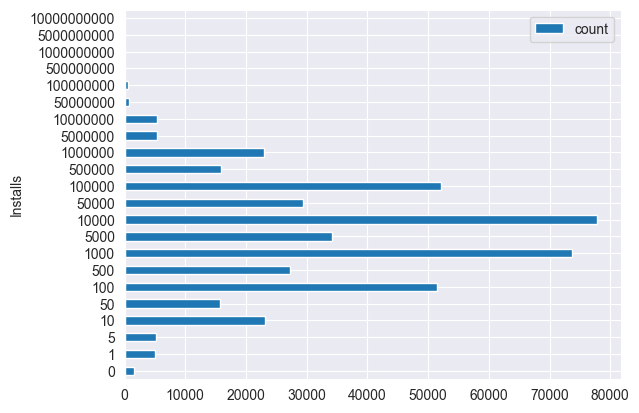

In [82]:
install_df.plot(kind = 'barh')

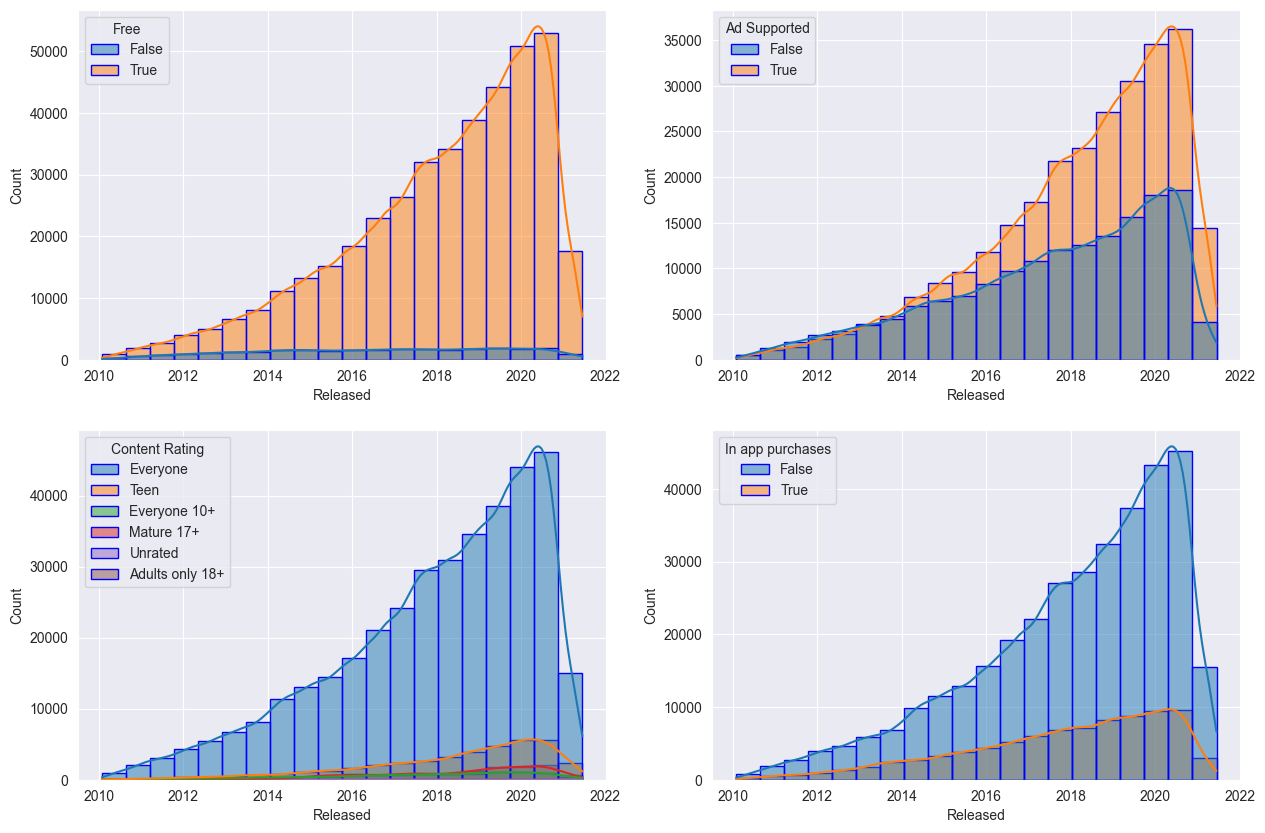

In [83]:
plt.figure(figsize=(15,10))
hue=['Free','Ad Supported','Content Rating','In app purchases']
for i in range(1,5):
    plt.subplot(2,2,i)
    sns.histplot(data=df,x='Released',kde=True,bins=20,edgecolor='blue',color='blue',hue=hue[i-1])

In [84]:
df.head()

,App Name,Category,Rating,Installs,Free,Price,Currency,Size,Minimum Android,Released,Content Rating,Ad Supported,In app purchases,Editor Choice,Developer
0,Logistics Management,Education,4,10000,True,0.0,USD,0-10M,4,2017-07-19,Everyone,True,False,False,eniseistudio
1,Estados Unidos Noticias,News & Magazines,4,1000,True,0.0,USD,0-10M,4,2017-05-05,Everyone,True,False,False,eniseistudio
2,Dental Assistant,Education,3,10000,True,0.0,USD,0-10M,4,2017-07-18,Everyone,True,False,False,eniseistudio
3,Medical Assistant,Education,4,5000,True,0.0,USD,0-10M,4,2017-06-24,Everyone,True,False,False,eniseistudio
4,Business Administration,Education,4,50000,True,0.0,USD,0-10M,4,2017-06-13,Everyone,True,False,False,eniseistudio


<Axes: xlabel='Rating'>

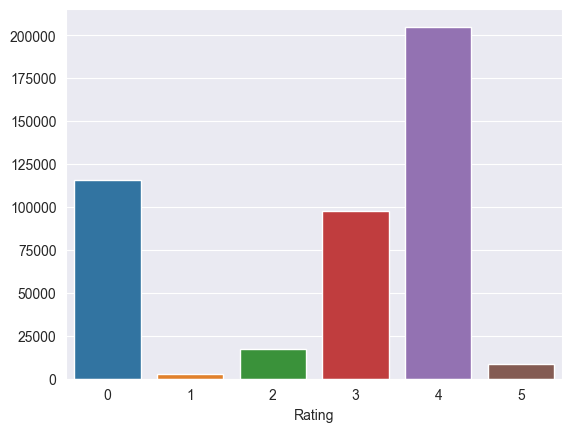

In [85]:
# sns.histplot(df,x='Rating',bins=5,edgecolor=None)
sns.barplot(x = df['Rating'].value_counts().index , y = df['Rating'].value_counts().values)

<Axes: xlabel='Price', ylabel='Count'>

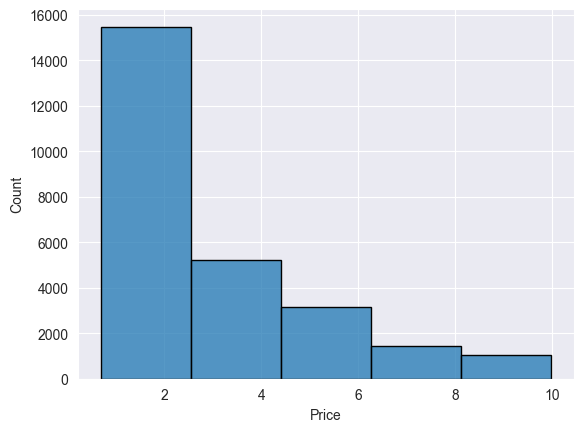

In [86]:
sns.histplot(df[(df['Free']==False) & (df['Price']<10)], x = 'Price',bins=5,edgecolor='black')

# Hold for future